Problem Statement: Classify an IRIS flower into one of the three categories ['setosa', 'versicolor', 'virginica'] based on their petal and sepal width and height. We will use logistic regression for this classification problem

<img src="iris.png" width="300" height="300">

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load Data

In [7]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.target.unique()

array([0, 1, 2])

### Data Visualization

In [11]:
df['target_name'] = df['target'].map({0:"setosa", 1:"versicolor",2:"virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

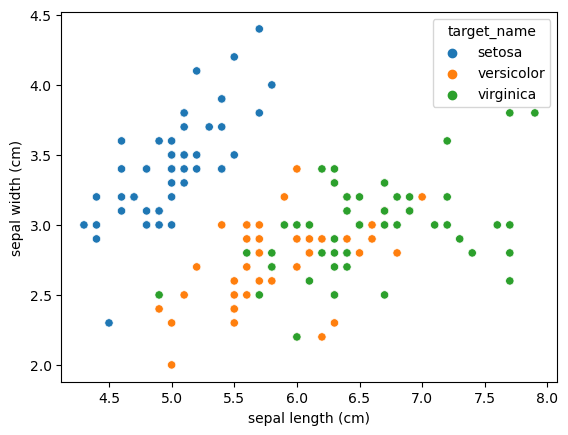

In [12]:
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)', hue='target_name')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

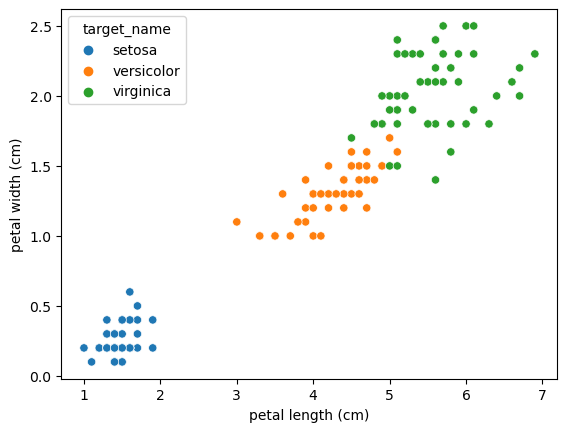

In [13]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='target_name')

In [14]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=df['target']

### Train a Logistic Regression Model

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X,y)

LogisticRegression(max_iter=200)

### Model Evaluation: Accuracy

In [18]:
model.score(X_test,y_test)

1.0

### Model Evaluation: Precision, Recall, F1-Score

In [20]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Model Evaluation: Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

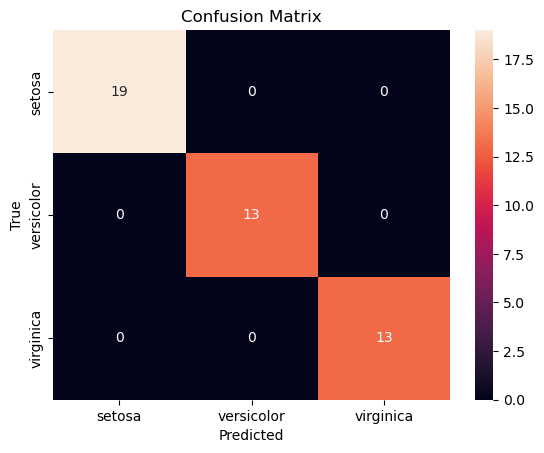

In [22]:
sns.heatmap(cn,annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")